In [1]:
import pyhf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
model = pyhf.simplemodels.hepdata_like([6], [9], [np.sqrt(9)])

signal_pars = model.config.suggested_init()
signal_pars[model.config.poi_index] = 1.0

bkg_pars = model.config.suggested_init()
bkg_pars[model.config.poi_index] = 0.0

signal_pdf = model.make_pdf(signal_pars)
bkg_pdf = model.make_pdf(bkg_pars)

sample_shape = (1000,)

signal_sample = signal_pdf.sample(sample_shape)
bkg_sample = bkg_pdf.sample(sample_shape)

In [4]:
signal_tests = np.asarray([pyhf.utils.hypotest(1.0, sample, model, return_test_statistics=True)[1][0]
                           for sample in signal_sample])
bkg_tests = np.asarray([pyhf.utils.hypotest(1.0, sample, model, return_test_statistics=True)[1][0]
                        for sample in bkg_sample])

# signal_tests = np.asarray([pyhf.utils.qmu(1.0, sample, model, None, None) for sample in signal_sample])
# bkg_tests = np.asarray([pyhf.utils.qmu(1.0, sample, model, None, None) for sample in bkg_sample])

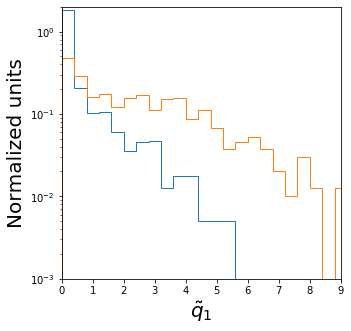

In [5]:
_, b, _ = plt.hist(signal_tests, bins=np.linspace(0, 10, 26), histtype="step", density=True)
_, b, _ = plt.hist(bkg_tests, bins=np.linspace(0, 10, 26), histtype="step", density=True)

_fontsize=20

plt.gcf().set_size_inches(5,5)
plt.xlim(0, 9)
plt.ylim(1e-3, 2)
plt.semilogy()
plt.xlabel(r"$\tilde{q}_1$", fontsize=_fontsize)
plt.ylabel("Normalized units", fontsize=_fontsize);